In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
from padhai import MPNeuron, Perceptron, PerceptronWithSigmoid
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_3'

In [2]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    np.random.seed(0)
    # initialise w, b
    if initialise:
      self.w = np.random.rand(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [4]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("RGBA")
        pixdata = image.load()  
        for y in range(image.size[1]):  
            for x in range(image.size[0]):  
                r, g, b, a = image.getpixel((x, y))
                if (r > 1) and (g > 1) and (b > 1):
                    pixdata[x, y] = (0, 0, 0, 0)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [5]:
languages = ['ta', 'hi', 'en']

images_train = read_all("level_3_train/"+LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
    images_train.update(read_all("level_3_train/"+LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("level_3_test/kaggle_"+LEVEL, key_prefix='') # change the path
print(len(images_test))

Reading:



Reading:



Reading:



Reading:



9000
Reading:



3000


In [6]:
images_test['0']

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [6]:
img = Image.open('displayPanel_0_flip_none_c27_25.jpg')
img = img.convert("RGBA")  
pixdata = img.load()  
for y in range(img.size[1]):  
    for x in range(img.size[0]):  
        r, g, b, a = img.getpixel((x, y))
        if (r > 1) and (g > 1) and (b > 1):
            pixdata[x, y] = (0, 0, 0, 0)
            #Remove anti-aliasing outline of body.
#            if r == 0 and g == 0 and b == 0:
#                pixdata[x, y] = (255, 255, 255, 0)
#            img2 = img.filter(ImageFilter.GaussianBlur(radius=1))  
            img.save('filenameout_door.png', "PNG") 

In [103]:
img.getpixel((52,2))

(0, 0, 0, 0)

In [107]:
img.load()

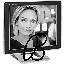

In [110]:
imgi = Image.open('displayPanel_0_flip_none_c27_25.jpg').convert("RGBA") 
imgi.

In [7]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
    ID_test.append(int(key))
    X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(9000, 4096) (9000,)
(3000, 4096)


In [7]:
#X_train_scaled = X_train / 255

In [8]:
#X_test_scaled = X_test / 255

In [8]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [132]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [133]:
#Doing the PCA on the train data
pca.fit(X_scaled_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [134]:
pca.components_

array([[ 0.01813694,  0.01969598,  0.01570162, ...,  0.01209057,
         0.01556919,  0.01506997],
       [-0.02055028, -0.02285427, -0.02033289, ..., -0.01261518,
        -0.0160272 , -0.01571104],
       [ 0.01256859,  0.01377354,  0.01659258, ..., -0.0218484 ,
        -0.02453069, -0.01890197],
       ...,
       [-0.00996088,  0.01226029,  0.03272689, ..., -0.00015277,
        -0.01332665,  0.00952102],
       [ 0.01418905, -0.00890365,  0.01239554, ..., -0.00898491,
         0.00658373, -0.00148346],
       [ 0.00855758, -0.00649526, -0.00941345, ..., -0.01280616,
         0.00450903, -0.00043427]])

In [135]:
pca.explained_variance_ratio_

array([1.80375320e-01, 6.51865434e-02, 4.30190768e-02, ...,
       1.42900190e-07, 1.41234791e-07, 1.36351851e-07])

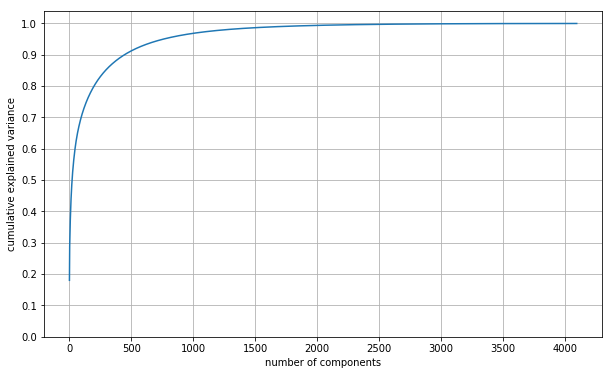

In [136]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 4096, step=500))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(b=True)
plt.show()

#### Looks like 1500 components are enough to describe 99% of the variance in the dataset
- We'll choose 1500 components for our modeling

In [137]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=1800)

In [138]:
df_train_pca = pca_final.fit_transform(X_scaled_train)
df_train_pca.shape

(9000, 1800)

In [139]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [140]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 9.430879356329839e-15 , min corr:  -1.0221557404624773e-14


In [141]:
df_train_pca.shape[1]

1800

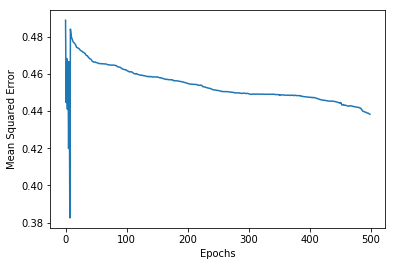

In [146]:
sn_mse = SigmoidNeuron()
sn_mse.fit(df_train_pca, Y_train, epochs=500, learning_rate=0.01, loss_fn="mse", display_loss=True)

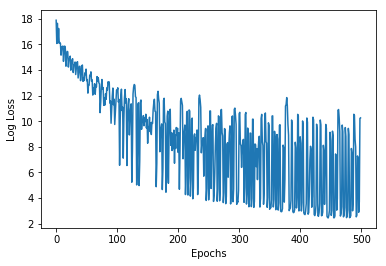

In [9]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=500, learning_rate=0.01, loss_fn="ce", display_loss=True)

In [148]:
#Applying selected components to the test data - 16 components
test_pca = pca_final.transform(X_scaled_test)
test_pca.shape

(3000, 1800)

In [10]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [11]:
#print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.6976666666666667
--------------------------------------------------


## Sample Submission

In [12]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision_level3_pca_255.csv", index=False)